In [37]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cartopy.crs as ccrs

In [30]:
virus_spots = pandas.read_json('./prepared_countries.json')
virus_spots

,headline,city,country,country_code,latitude,longitude
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667
...,...,...,...,...,...,...
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149
604,More Zika patients reported in Bella Vista,Bella Vista,Argentina,AR,-27.03424,-65.30196


In [31]:
temp_df = virus_spots.iloc[:, 4:]
all_locations_coords = temp_df.values.tolist()
print(all_locations_coords)

[[25.77427, -80.19366], [40.71427, -74.00597], [25.79065, -80.13005], [-8.05389, -34.88111], [32.78306, -96.80667], [-14.83333, -64.9], [29.76328, -95.36327], [46.20222, 6.14569], [33.749, -84.38798], [-23.5475, -46.63611], [25.82176, -80.24116], [38.62727, -90.19789], [-31.5375, -68.53639], [29.30135, -94.7977], [14.6042, 120.9822], [10.69694, 122.56444], [-37.46973, -72.35366], [28.53834, -81.37924], [41.85003, -87.65005], [14.18368, 121.28554], [53.24488, -3.13231], [39.29038, -76.61219], [42.98339, -81.23304], [10.82302, 106.62965], [39.95233, -75.16379], [52.97633, -0.02664], [48.85341, 2.3487999999999998], [9.89898, -84.00287], [13.75398, 100.50144], [39.9075, 116.39723], [-12.97111, -38.51083], [3.1412, 101.68653], [16.80528, 96.15611], [30.43826, -84.28073], [-31.42797, -62.08266], [38.98067, -77.10026], [-19.26639, 146.80569], [14.5832, 121.0409], [-36.61667, -64.28333], [13.68935, -89.18718], [35.15952, -84.87661], [30.26715, -97.74306], [-22.72528, -47.64917], [-12.04318, -7

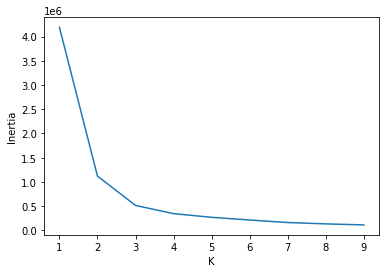

In [40]:
# looking for right kernel sizes using elbow algorithm
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(all_locations_coords).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [44]:
kmeans_model = KMeans(n_clusters=5).fit_predict(all_locations_coords)

In [45]:
virus_spots['cluster'] = list(kmeans_model)
virus_spots

,headline,city,country,country_code,latitude,longitude,cluster
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366,0
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597,0
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005,0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111,4
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667,0
...,...,...,...,...,...,...,...
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633,2
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694,1
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149,3
604,More Zika patients reported in Bella Vista,Bella Vista,Argentina,AR,-27.03424,-65.30196,4


Plotting cluster 0
Plotting cluster 1
Plotting cluster 2
Plotting cluster 3
Plotting cluster 4


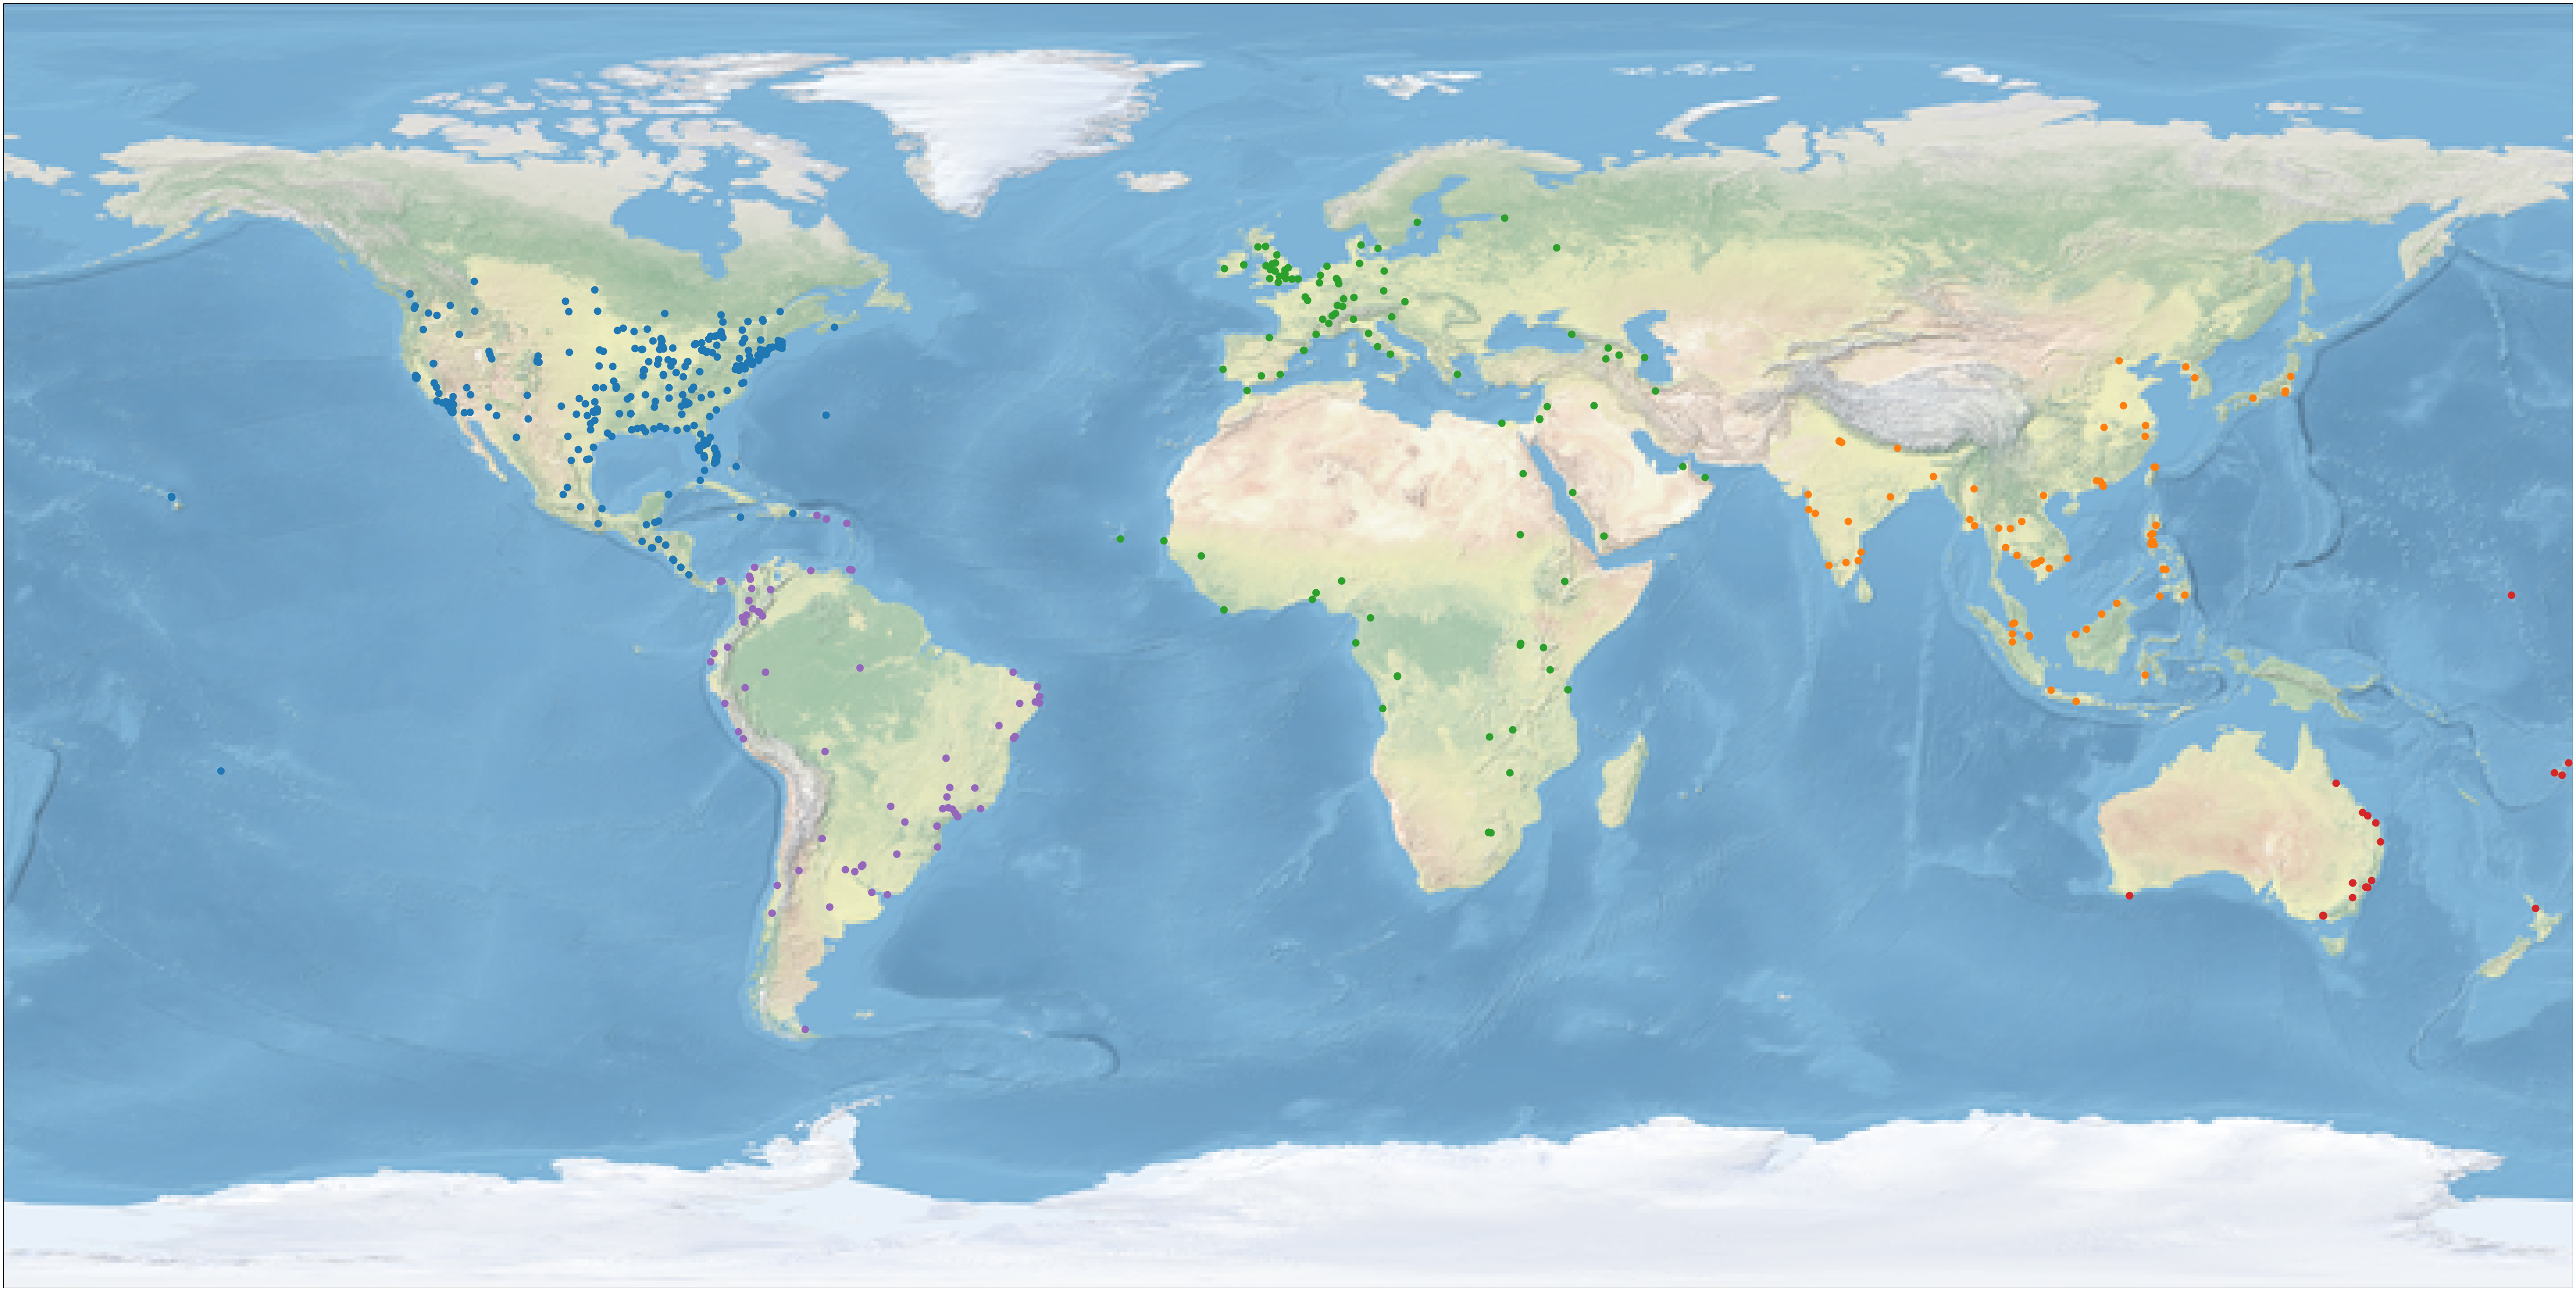

In [46]:
plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for cluster_id, df_cluster in virus_spots.groupby('cluster'):
    print(f'Plotting cluster {cluster_id}')
    plt.scatter(df_cluster.longitude, df_cluster.latitude, linewidths=10, transform=ccrs.Geodetic())


plt.show()

## Simple DBSCAN

In [ ]:
epsilon=12
min_points = 7

cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
dbscan_model = cluster_model.fit_predict(all_locations_coords)
virus_spots['cluster'] = list(dbscan_model)
virus_spots

Plotting cluster -1
Plotting cluster 0
Plotting cluster 1
Plotting cluster 2
Plotting cluster 3
Plotting cluster 4
Plotting cluster 5
Plotting cluster 6
Plotting cluster 7


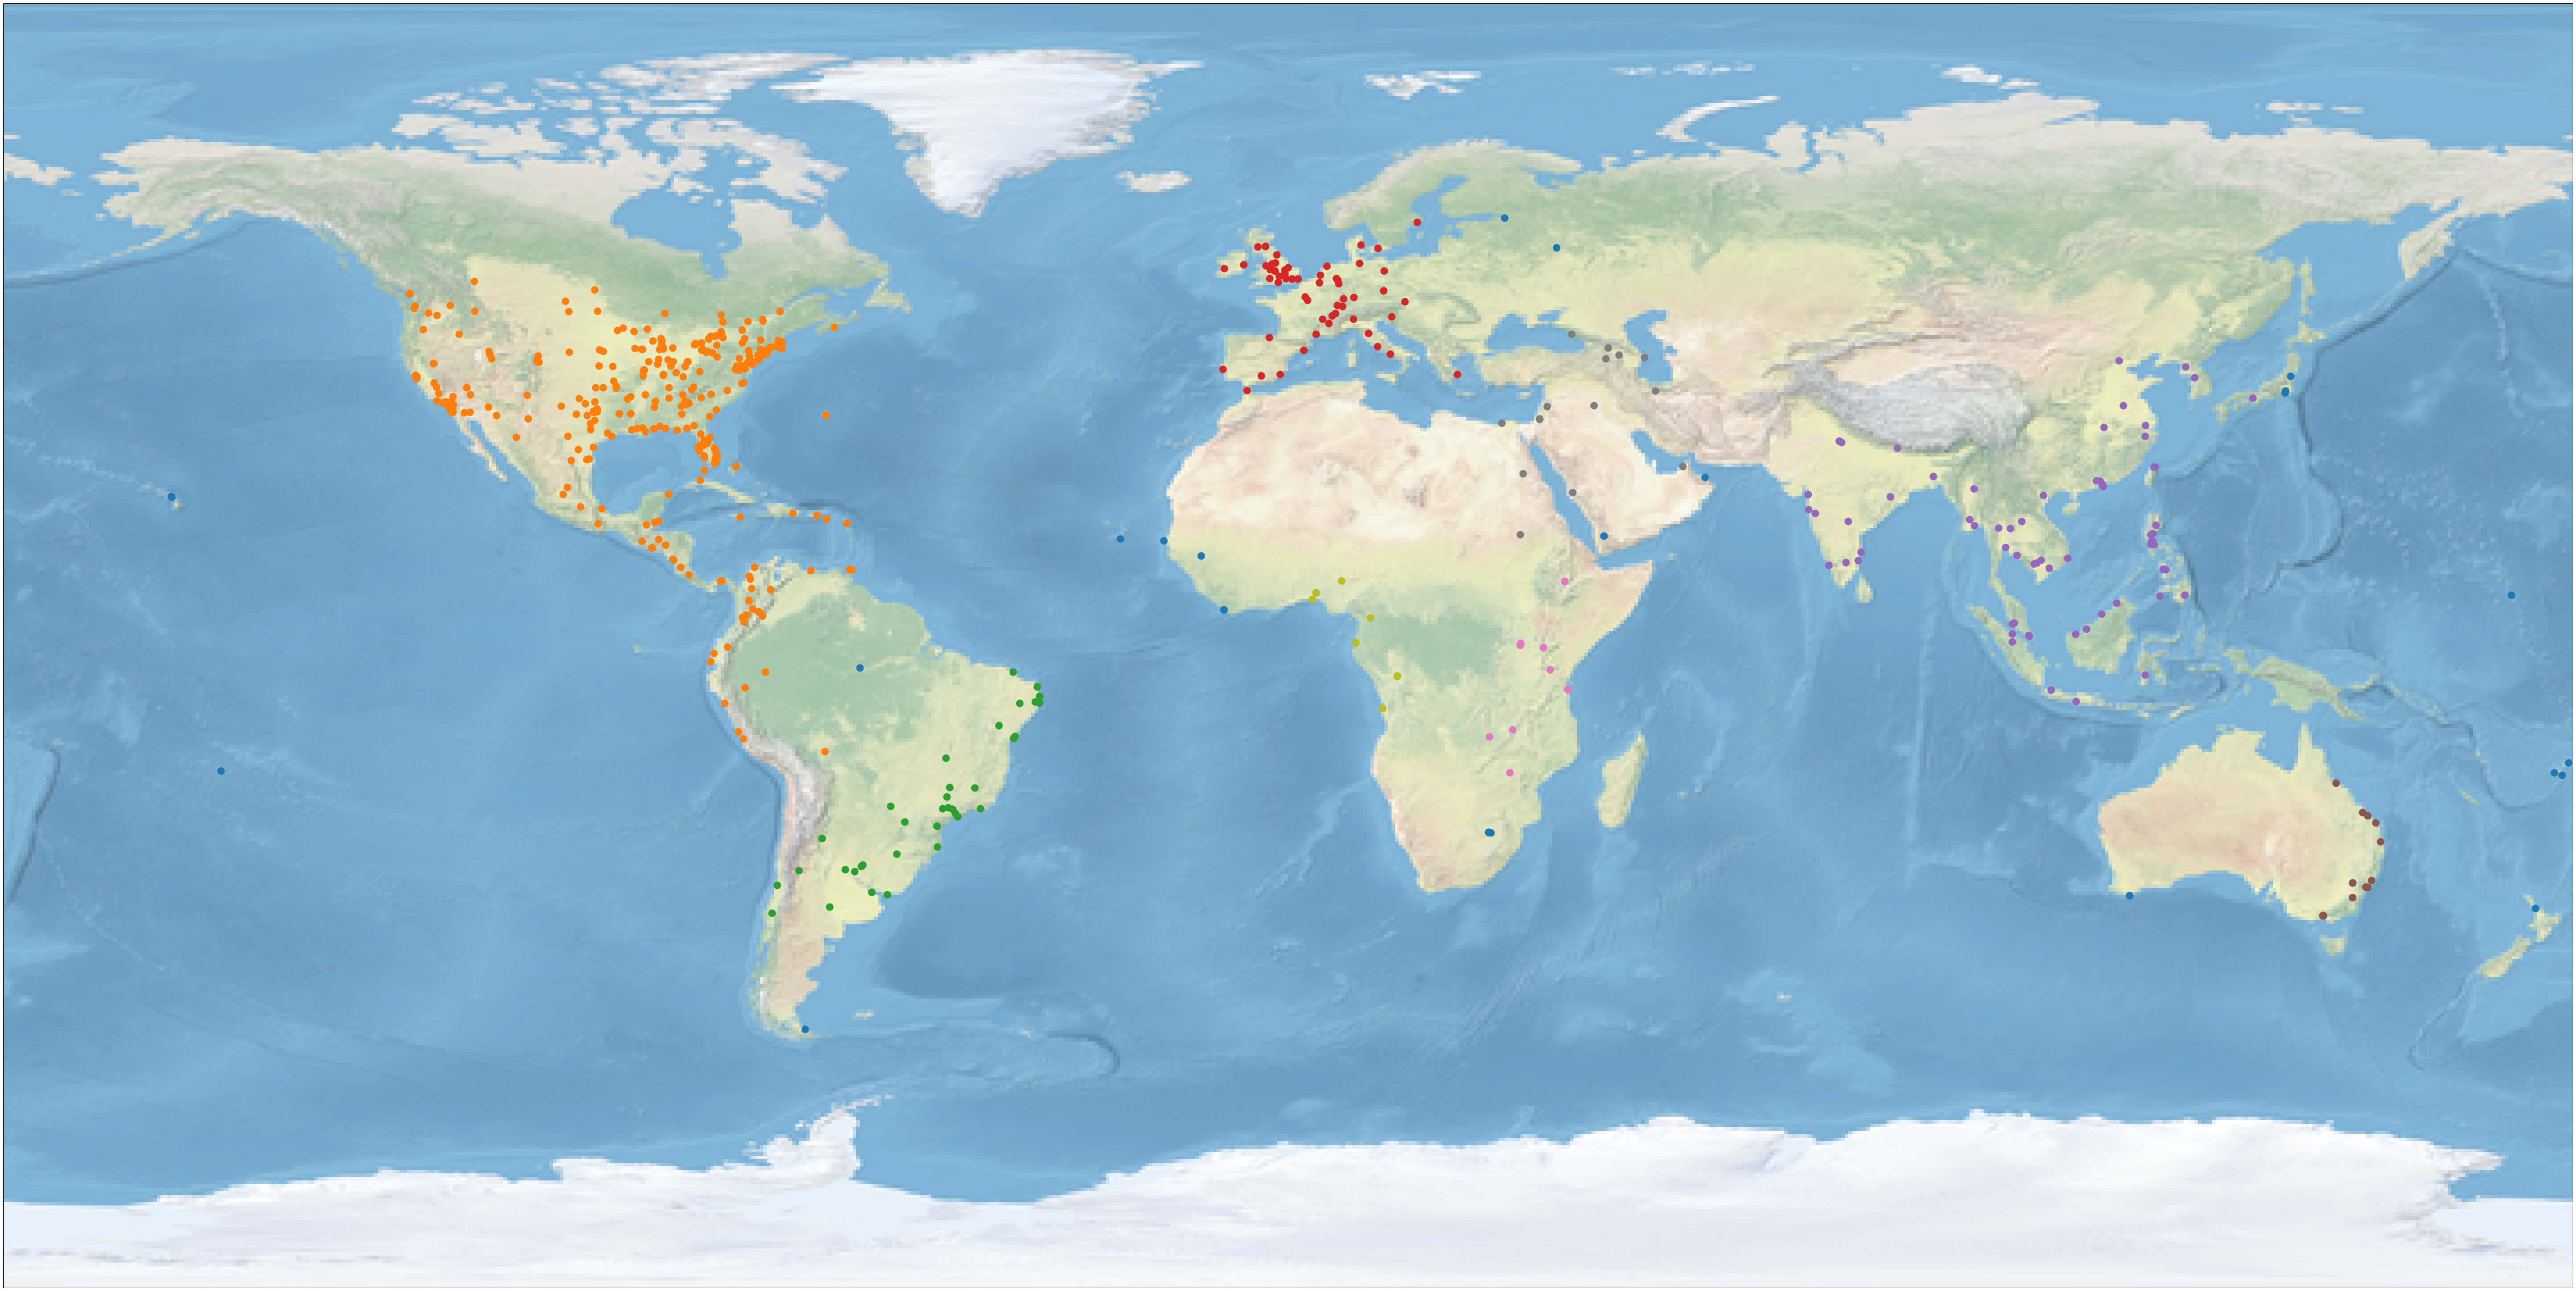

In [71]:
plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for cluster_id, df_cluster in virus_spots.groupby('cluster'):
    print(f'Plotting cluster {cluster_id}')
    plt.scatter(df_cluster.longitude, df_cluster.latitude, linewidths=10, transform=ccrs.Geodetic())


plt.show()

## DBSCAN with custom scan

In [ ]:
def distance_on_unit_sphere(point_1, point_2):

    # skipping calculations for the same point
    if np.array_equal(point_1, point_2):
        return 0
    
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - point_1[0]) * degrees_to_radians
    phi2 = (90.0 - point_2[0]) * degrees_to_radians
        
    # theta = longitude
    theta1 = point_1[1] * degrees_to_radians
    theta2 = point_2[1] * degrees_to_radians
    
    cos = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) + 
           math.cos(phi1) * math.cos(phi2))
    
    try:
        arc = math.acos(cos)
    except ValueError:
        return 1000000

    arc = arc * 6400
    return arc

In [59]:
epsilon=800
min_points=4

cluster_model = DBSCAN(eps=epsilon, min_samples=min_points, metric=distance_on_unit_sphere)
dbscan_model = cluster_model.fit_predict(all_locations_coords)
virus_spots['cluster'] = list(dbscan_model)
virus_spots

,headline,city,country,country_code,latitude,longitude,cluster
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366,0
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597,0
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005,0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111,1
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667,0
...,...,...,...,...,...,...,...
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633,10
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694,4
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149,-1
604,More Zika patients reported in Bella Vista,Bella Vista,Argentina,AR,-27.03424,-65.30196,3


Plotting cluster -1
Plotting cluster 0
Plotting cluster 1
Plotting cluster 2
Plotting cluster 3
Plotting cluster 4
Plotting cluster 5
Plotting cluster 6
Plotting cluster 7
Plotting cluster 8
Plotting cluster 9
Plotting cluster 10
Plotting cluster 11


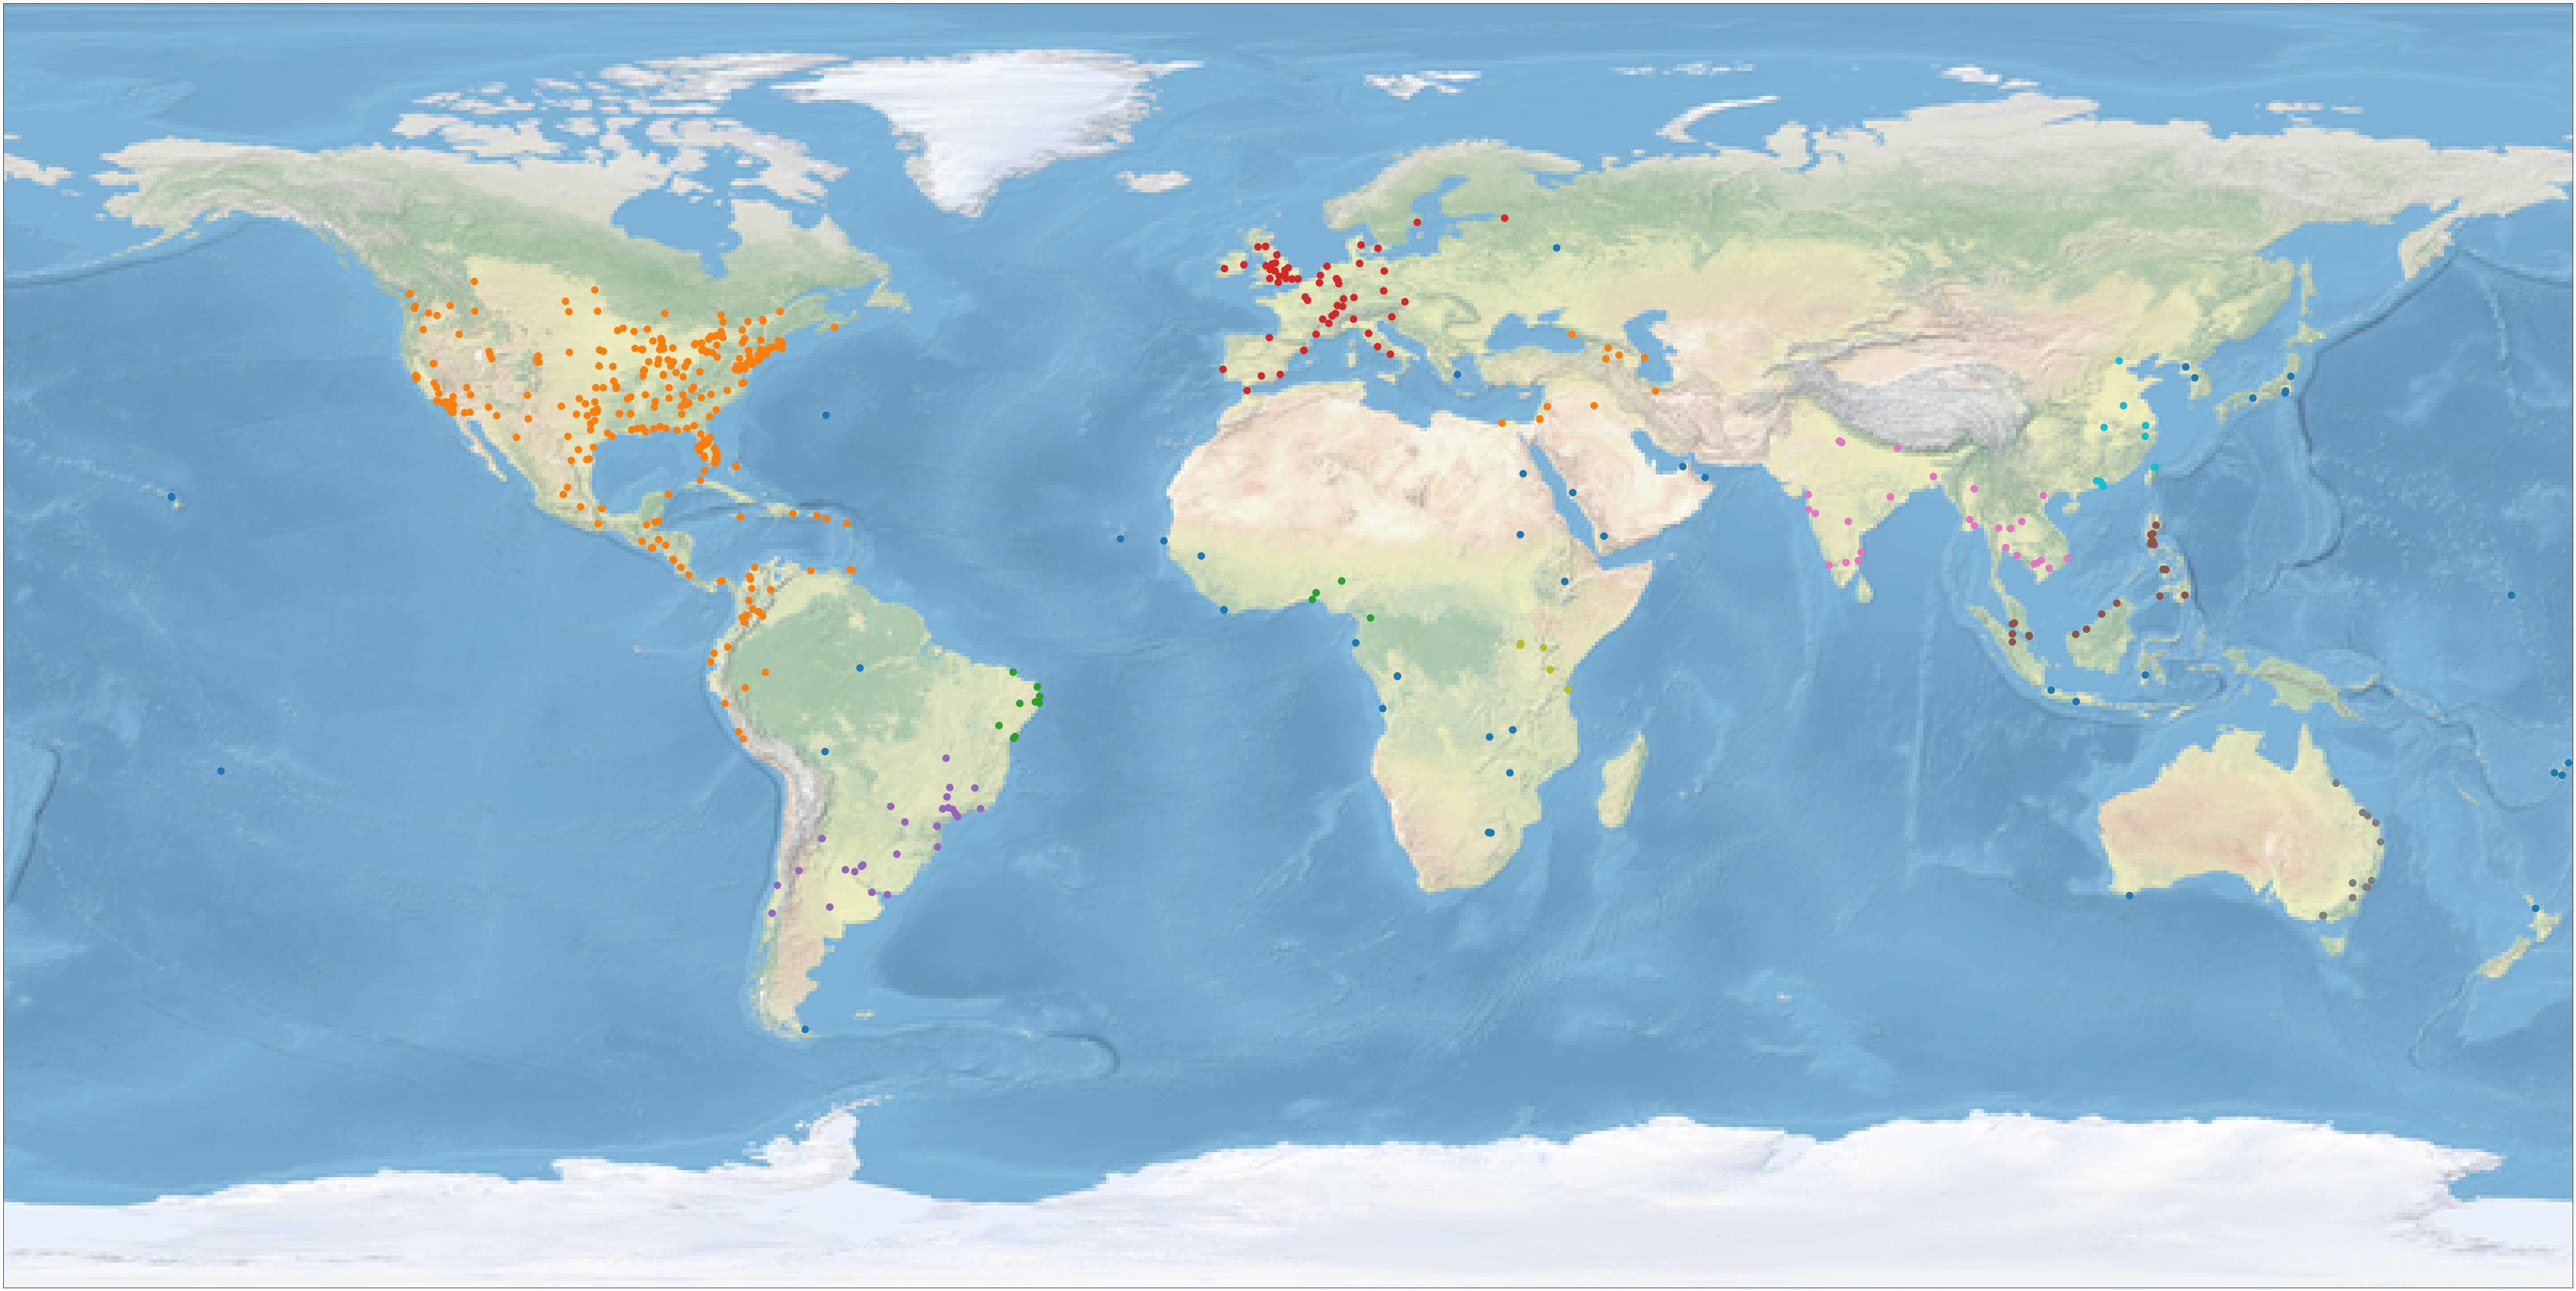

In [60]:
plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for cluster_id, df_cluster in virus_spots.groupby('cluster'):
    print(f'Plotting cluster {cluster_id}')
    plt.scatter(df_cluster.longitude, df_cluster.latitude, linewidths=10, transform=ccrs.Geodetic())


plt.show()